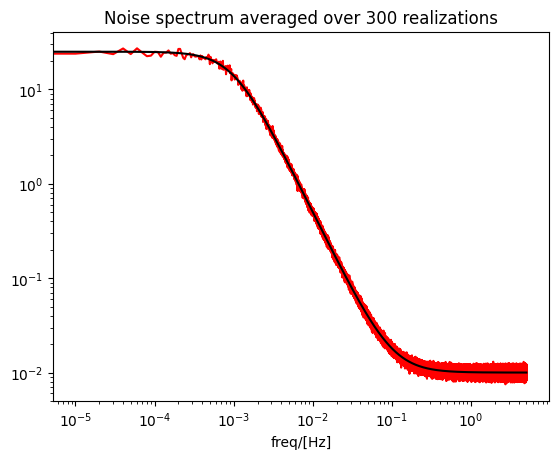

In [13]:
# Martin original
import ducc0
import numpy as np
import matplotlib.pyplot as plt

sigma = 1e-1
f_min=1e-3
f_knee=1e-1
f_samp=10.
slope=-1.7
nsamp = 1000000

gen = ducc0.misc.OofaNoise(sigmawhite=sigma, f_min=f_min, f_knee=f_knee, f_samp=f_samp, slope=slope)

power = np.zeros(nsamp)
nps = int(300)

for i in np.arange(nps):
    inp = np.random.normal(0.,1.,(nsamp,))
    noise = gen.filterGaussian(inp)

    ps = np.abs(np.fft.fft(noise))**2 / nsamp

    power = power + ps

ps = power / nps

time_step = 1. / f_samp
freqs = np.fft.fftfreq(noise.size, time_step)
ps_theory = sigma**2 * ((freqs**2+f_knee**2)/(freqs**2+f_min**2))**(-slope/2)

plt.title('Noise spectrum averaged over '+str(nps)+' realizations')
plt.xlabel("freq/[Hz]")
plt.loglog(freqs[:ps.size//2],ps[:ps.size//2],color='red')
plt.loglog(freqs[:ps.size//2],ps_theory[:ps.size//2],color='black')
plt.show()


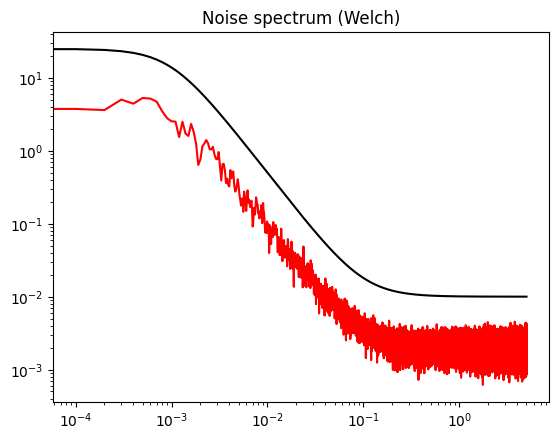

In [30]:
# Martin with Welch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

sigma = 1e-1
f_min=1e-3
f_knee=1e-1
f_samp=10.
slope=-1.7
nsamp = 1000000

# Noise generator
gen = ducc0.misc.OofaNoise(sigmawhite=sigma, f_min=f_min, f_knee=f_knee, f_samp=f_samp, slope=slope)

inp = np.random.normal(0., 1., (nsamp,))    # Gaussian white noise
noise = gen.filterGaussian(inp)             # Filter to obtain 1/f noise
   
# Welch method
freqs, Pxx = welch(noise, fs=f_samp, window='hann', nperseg=1e5, noverlap=0.5e5, scaling='density')

# Theoretical spectrum
ps_theory = sigma**2 * ((freqs**2 + f_knee**2) / (freqs**2 + f_min**2))**(-slope / 2)

plt.title('Noise spectrum (Welch)')
plt.loglog(freqs, Pxx, color='red')
plt.loglog(freqs, ps_theory, color='black')
plt.show()